In [2]:
import numpy as np
import os
os.chdir('C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB6/')
from src import dataOrganizer as org
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras as ks

In [3]:
device = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(device))

Num GPUs Available:  0


In [4]:
# Load the dataset
source_dir = "C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB6/plates/"
data_dir = "C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB6/data/"

In [5]:
dataorg = org.DataOrganizer(source_dir, data_dir)
dataorg.organize()

Organizing...
Done!


True

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 150),
    batch_size=10)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 150),
    batch_size=10)


Found 1204 files belonging to 36 classes.
Using 964 files for training.
Found 1204 files belonging to 36 classes.
Using 240 files for validation.


32


array([0, 0, 0], dtype=uint8)

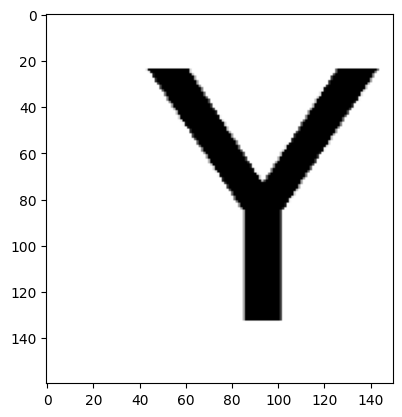

In [6]:
imgs, lbls = next(iter(train_ds))
plt.imshow(imgs[5].numpy().astype("uint8"), cmap="gray")
print(lbls[9].numpy())
imgs[5].numpy().astype("uint8")[100, 100]

In [7]:
# creating a CNN model
cnn_model = ks.models.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 150, 3), padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    # ks.layers.Conv2D(128, (3, 3), activation='relu'),
    # ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Flatten(),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(36, activation='softmax')
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 18, 64)        0

In [8]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
cnn_model.fit(x=train_ds, validation_data=val_ds, epochs=10, verbose=2)

Epoch 1/10


97/97 - 17s - loss: 12.6029 - accuracy: 0.6857 - val_loss: 0.0517 - val_accuracy: 0.9583 - 17s/epoch - 173ms/step
Epoch 2/10
97/97 - 32s - loss: 0.0091 - accuracy: 0.9969 - val_loss: 4.3009e-04 - val_accuracy: 1.0000 - 32s/epoch - 325ms/step
Epoch 3/10
97/97 - 30s - loss: 2.0463e-04 - accuracy: 1.0000 - val_loss: 1.0467e-04 - val_accuracy: 1.0000 - 30s/epoch - 309ms/step
Epoch 4/10
97/97 - 27s - loss: 6.3275e-05 - accuracy: 1.0000 - val_loss: 4.4575e-05 - val_accuracy: 1.0000 - 27s/epoch - 279ms/step
Epoch 5/10
97/97 - 23s - loss: 2.6846e-05 - accuracy: 1.0000 - val_loss: 2.1010e-05 - val_accuracy: 1.0000 - 23s/epoch - 242ms/step
Epoch 6/10
97/97 - 23s - loss: 1.3570e-05 - accuracy: 1.0000 - val_loss: 1.1789e-05 - val_accuracy: 1.0000 - 23s/epoch - 236ms/step
Epoch 7/10
97/97 - 21s - loss: 7.8873e-06 - accuracy: 1.0000 - val_loss: 7.5581e-06 - val_accuracy: 1.0000 - 21s/epoch - 220ms/step
Epoch 8/10
97/97 - 22s - loss: 4.9941e-06 - accuracy: 1.0000 - val_loss: 4.9853e-06 - val_accuracy

In [11]:
os.chdir(source_dir)
os.chdir('..')
os.chdir('./models')
cnn_model.save('cnn_model_sequential_1.keras')